In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font = {"size"   : 20}
plt.rc("font", **font)
plt.rcParams['ytick.right']

df = pd.read_csv("int_ratio.data", skiprows = 1, 
                 header = None, 
                 delimiter=" ", 
                 names=range(26))


In [3]:
df = df.drop(df.columns[0], axis=1)
tdf = df.transpose()
tdf["layer"] = tdf.index
tdf.columns = ["21+24-bulk-half-tet", "21+24-bulk-full-tet", 
               "21+24-surf-half-tet", "21+24-surf-full-tet",
               "layer"]

col1 = tdf.pop("layer")
tdf.insert(0, "layer", col1)

In [41]:
tdf

,layer,21+24-bulk-half-tet,21+24-bulk-full-tet,21+24-surf-half-tet,21+24-surf-full-tet
1,1,36.0,36.0,36.0,36.0
2,2,36.0,36.0,36.0,36.0
3,3,18.0,36.0,17.0,35.0
4,4,18.0,0.0,20.0,3.0
5,5,18.0,36.0,16.0,31.0
6,6,18.0,1.0,20.0,7.0
7,7,18.0,33.0,16.0,28.0
8,8,18.0,5.0,20.0,10.0
9,9,18.0,31.0,12.0,18.0
10,10,18.0,5.0,32.0,30.0


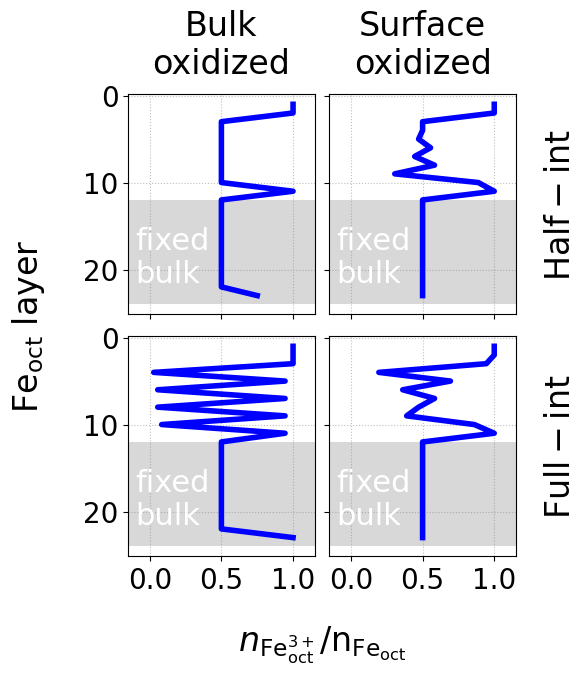

In [4]:

structures = list(tdf.columns[1::2])+list(tdf.columns[2::2])

row = 0
col = 0

fig, axis = plt.subplots(2, 2, figsize=(5, 6), facecolor="w", 
                         sharex=True, sharey=True)

fig.subplots_adjust(hspace=0.1, wspace=0.08)

axis[0, 1].set_yticks([0, 10, 20])
axis[0, 0].set_xticks([0, 0.5, 1.0])

axis[0, 0].invert_yaxis()
#axis[0, 0].invert_xaxis()

axis[0, 0].set_xlim([-0.15, 1.15])

axis[0, 1].set_ylabel(r"$\mathrm{Half-int}$", ha="center", fontsize=24, labelpad=20)
axis[1, 1].set_ylabel(r"$\mathrm{Full-int}$", ha="center", fontsize=24, labelpad=20)
axis[0, 1].yaxis.set_label_position("right")
axis[1, 1].yaxis.set_label_position("right")

axis[0, 0].set_title("Bulk\noxidized", fontsize=24, pad=15)
axis[0, 1].set_title("Surface\noxidized", fontsize=24, pad=15)


for system in structures:
    axis[col, row].plot(tdf[system]/36, tdf["layer"], linewidth=4, color="blue")
    axis[col, row].yaxis.grid(color='gray', linestyle='dotted', alpha=0.5)
    axis[col, row].xaxis.grid(color='gray', linestyle='dotted', alpha = 0.5)
    #axis[col, row].axhspan(0,12 , facecolor='lightblue', alpha=0.5)
    axis[col, row].axhspan(12,24 , facecolor='grey', alpha=0.3)
    axis[col, row].text(-0.1, 21.5, 'fixed\nbulk', color='white', fontsize=22)
    row +=1
    if row == 2:
        row = 0
        col += 1

# Invisible plot for title declaration
ax0 = fig.add_subplot(111, frame_on=False)
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_xlabel(r"$n_{\mathrm{{Fe}_{oct}^{3+}}}/\mathrm{n_{{Fe}_{oct}}}$", labelpad=45, fontsize=24)
ax0.set_ylabel(r"Fe$_\mathrm{oct}$ layer", labelpad=55, fontsize=24)
#ax0.set_title("21L + 24L", fontsize=30, pad=55)
plt.show()


In [5]:
fig.savefig('fe3_explicit_bulk_int.pdf',format='pdf', bbox_inches = "tight")
fig.savefig('fe3_explicit_bulk_int.png', dpi=300.0,format='png', bbox_inches = "tight")

In [10]:
pwd

'/run/user/1000/gvfs/sftp:host=workpc,user=emre/home/emre/221215_formate_on_001_dbt/2_withBulk'